In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from causallearn.search.ConstraintBased.PC import pc
from causallearn.utils.GraphUtils import GraphUtils

In [133]:
# load the data
df = pd.read_csv('data/esgdata.csv')
df.head()

,Year,Company_name,SEC_code,Industry_type,CSR_commitee,CSR_board_size,Compliance_environmental_laws,EPA_fines,Amount_of_fines,SDG_targets,...,Renewal_energy,Dow_jones_sustainability_index,FTSE4Good_Index,MSCI_ESG_index,Global_reporting_initiative,Integrated_reporting_framework,Risk_score,Controversy_level,Planning_zero_carbon,ESG_funds
0,2017,3M,MMM,1,0,0,1,0,0.0,ESG,...,1,1,2.0,3,1,0.0,33.61,3,0.0,844
1,2017,Abbott Laboratories,ABT,6,0,0,0,0,0.0,ESG,...,0,1,2.0,3,0,0.0,24.98,3,0.0,968
2,2017,AbbVie,ABBV,6,1,5,0,0,0.0,ESG,...,1,1,0.0,3,0,0.0,27.84,3,0.0,1124
3,2017,ABM Industries,ABM,1,0,0,0,0,0.0,ESG,...,0,1,0.0,0,1,0.0,0.00,0,0.0,90
4,2017,Activision Blizzard,ATVI,1,0,0,0,0,0.0,G,...,0,1,0.0,3,0,0.0,18.94,4,0.0,706


In [134]:
# check the data types
df.dtypes

Year                                int64
Company_name                       object
SEC_code                           object
Industry_type                       int64
CSR_commitee                        int64
CSR_board_size                      int64
Compliance_environmental_laws       int64
EPA_fines                           int64
Amount_of_fines                   float64
SDG_targets                        object
Issue_green_bonds                   int64
Govt_collaboration                float64
Total_carbon_emissions            float64
Direct_carbon_emissions           float64
Indirect_carbon_emissions         float64
Scope3_carbon_emissions           float64
Environmental_scores              float64
Disclosure_scores                 float64
Energy_conservation                 int64
Water_treatment                     int64
Recycling                           int64
Biodiversity                        int64
Waste_management                    int64
Green_innovation                  

In [135]:
df.describe()

,Year,Industry_type,CSR_commitee,CSR_board_size,Compliance_environmental_laws,EPA_fines,Amount_of_fines,Issue_green_bonds,Govt_collaboration,Total_carbon_emissions,...,Renewal_energy,Dow_jones_sustainability_index,FTSE4Good_Index,MSCI_ESG_index,Global_reporting_initiative,Integrated_reporting_framework,Risk_score,Controversy_level,Planning_zero_carbon,ESG_funds
count,2313.000000,2313.000000,2313.000000,2313.000000,2313.000000,2313.000000,2.313000e+03,2313.000000,2311.000000,2313.000000,...,2313.000000,2313.000000,2312.000000,2313.000000,2313.000000,2311.000000,2313.000000,2313.000000,2312.000000,2313.000000
mean,2019.012970,9.191094,0.503675,2.252486,0.322525,0.051881,3.277716e+04,0.057933,0.305928,3780.731391,...,0.228275,0.969736,0.460208,2.217034,0.511457,0.196452,19.231518,1.816688,0.086505,565.295288
std,1.412624,5.298345,0.500095,2.469586,0.467544,0.221834,1.096859e+06,0.233668,0.460899,23714.493131,...,0.419812,0.171349,0.839922,1.316821,0.499977,0.484751,9.964343,1.055607,0.281169,372.958915
min,2017.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,13.760000,1.000000,0.000000,184.000000
50%,2019.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,89.940000,...,0.000000,1.000000,0.000000,3.000000,1.000000,0.000000,20.330000,2.000000,0.000000,588.000000
75%,2020.000000,13.000000,1.000000,4.000000,1.000000,0.000000,0.000000e+00,0.000000,1.000000,872.840000,...,0.000000,1.000000,0.000000,3.000000,1.000000,0.000000,25.740000,2.000000,0.000000,838.000000
max,2021.000000,20.000000,1.000000,11.000000,1.000000,1.000000,5.200000e+07,1.000000,1.000000,998992.600000,...,1.000000,1.000000,2.000000,3.000000,1.000000,2.000000,51.460000,5.000000,1.000000,2003.000000


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2313 entries, 0 to 2312
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            2313 non-null   int64  
 1   Company_name                    2313 non-null   object 
 2   SEC_code                        2313 non-null   object 
 3   Industry_type                   2313 non-null   int64  
 4   CSR_commitee                    2313 non-null   int64  
 5   CSR_board_size                  2313 non-null   int64  
 6   Compliance_environmental_laws   2313 non-null   int64  
 7   EPA_fines                       2313 non-null   int64  
 8   Amount_of_fines                 2313 non-null   float64
 9   SDG_targets                     2313 non-null   object 
 10  Issue_green_bonds               2313 non-null   int64  
 11  Govt_collaboration              2311 non-null   float64
 12  Total_carbon_emissions          23

In [137]:
# check for missing values
df.isnull().sum()

Year                              0
Company_name                      0
SEC_code                          0
Industry_type                     0
CSR_commitee                      0
CSR_board_size                    0
Compliance_environmental_laws     0
EPA_fines                         0
Amount_of_fines                   0
SDG_targets                       0
Issue_green_bonds                 0
Govt_collaboration                2
Total_carbon_emissions            0
Direct_carbon_emissions           0
Indirect_carbon_emissions         0
Scope3_carbon_emissions           0
Environmental_scores              0
Disclosure_scores                 0
Energy_conservation               0
Water_treatment                   0
Recycling                         0
Biodiversity                      0
Waste_management                  0
Green_innovation                  0
GHG_sales                         0
Net_zero_targets                  0
Disclosure_of_R&D                 0
Climate_change_policy       

In [138]:
# impute missing values with the mode value of the column of the same company
for index, row in df.iterrows():
    for col in df.columns:
        if pd.isnull(row[col]):
            df.at[index, col] = df[df['Company_name'] == row['Company_name']][col].mode().values[0]
df.isnull().sum()

Year                              0
Company_name                      0
SEC_code                          0
Industry_type                     0
CSR_commitee                      0
CSR_board_size                    0
Compliance_environmental_laws     0
EPA_fines                         0
Amount_of_fines                   0
SDG_targets                       0
Issue_green_bonds                 0
Govt_collaboration                0
Total_carbon_emissions            0
Direct_carbon_emissions           0
Indirect_carbon_emissions         0
Scope3_carbon_emissions           0
Environmental_scores              0
Disclosure_scores                 0
Energy_conservation               0
Water_treatment                   0
Recycling                         0
Biodiversity                      0
Waste_management                  0
Green_innovation                  0
GHG_sales                         0
Net_zero_targets                  0
Disclosure_of_R&D                 0
Climate_change_policy       

In [139]:
# shape after imputing missing values
print(df.shape)

(2313, 38)


In [140]:
# handling categorical variables
df['Total_carbon_emissions'] = df['Total_carbon_emissions'].astype('float64')
df['Direct_carbon_emissions'] = df['Direct_carbon_emissions'].astype('float64')
df['Indirect_carbon_emissions'] = df['Indirect_carbon_emissions'].astype('float64')

for index, row in df.iterrows():
    if df['GHG_sales'].iloc[index] == 'No':
        df.at[index, 'GHG_sales'] = df[df['Company_name'] == row['Company_name']]['GHG_sales'].mean()
df['GHG_sales'] = df['GHG_sales'].astype('float64')

le = LabelEncoder()
df['SDG_targets'] = le.fit_transform(df['SDG_targets'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)
for index, row in df.iterrows():
    if df['SDG_targets'].iloc[index] < 2:
        df.at[index, 'SDG_targets'] = df[df['Company_name'] == row['Company_name']]['SDG_targets'].mode().values[0]

# drop the company name and code columns
df = df.drop(['Company_name', 'SEC_code'], axis=1)

{'-': 0, '0': 1, 'E': 2, 'EG': 3, 'ES': 4, 'ESG': 5, 'ESG ': 6, 'G': 7, 'S': 8, 'SG': 9}


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2313 entries, 0 to 2312
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            2313 non-null   int64  
 1   Industry_type                   2313 non-null   int64  
 2   CSR_commitee                    2313 non-null   int64  
 3   CSR_board_size                  2313 non-null   int64  
 4   Compliance_environmental_laws   2313 non-null   int64  
 5   EPA_fines                       2313 non-null   int64  
 6   Amount_of_fines                 2313 non-null   float64
 7   SDG_targets                     2313 non-null   int32  
 8   Issue_green_bonds               2313 non-null   int64  
 9   Govt_collaboration              2313 non-null   float64
 10  Total_carbon_emissions          2313 non-null   float64
 11  Direct_carbon_emissions         2313 non-null   float64
 12  Indirect_carbon_emissions       23

In [142]:
# splitting the dataset into training and testing sets
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [143]:
# Use the PC algorithm to discover causal relationships
cg = pc(df_train.values)

Depth=13, working on node 35: 100%|██████████| 36/36 [00:00<00:00, 679.25it/s]


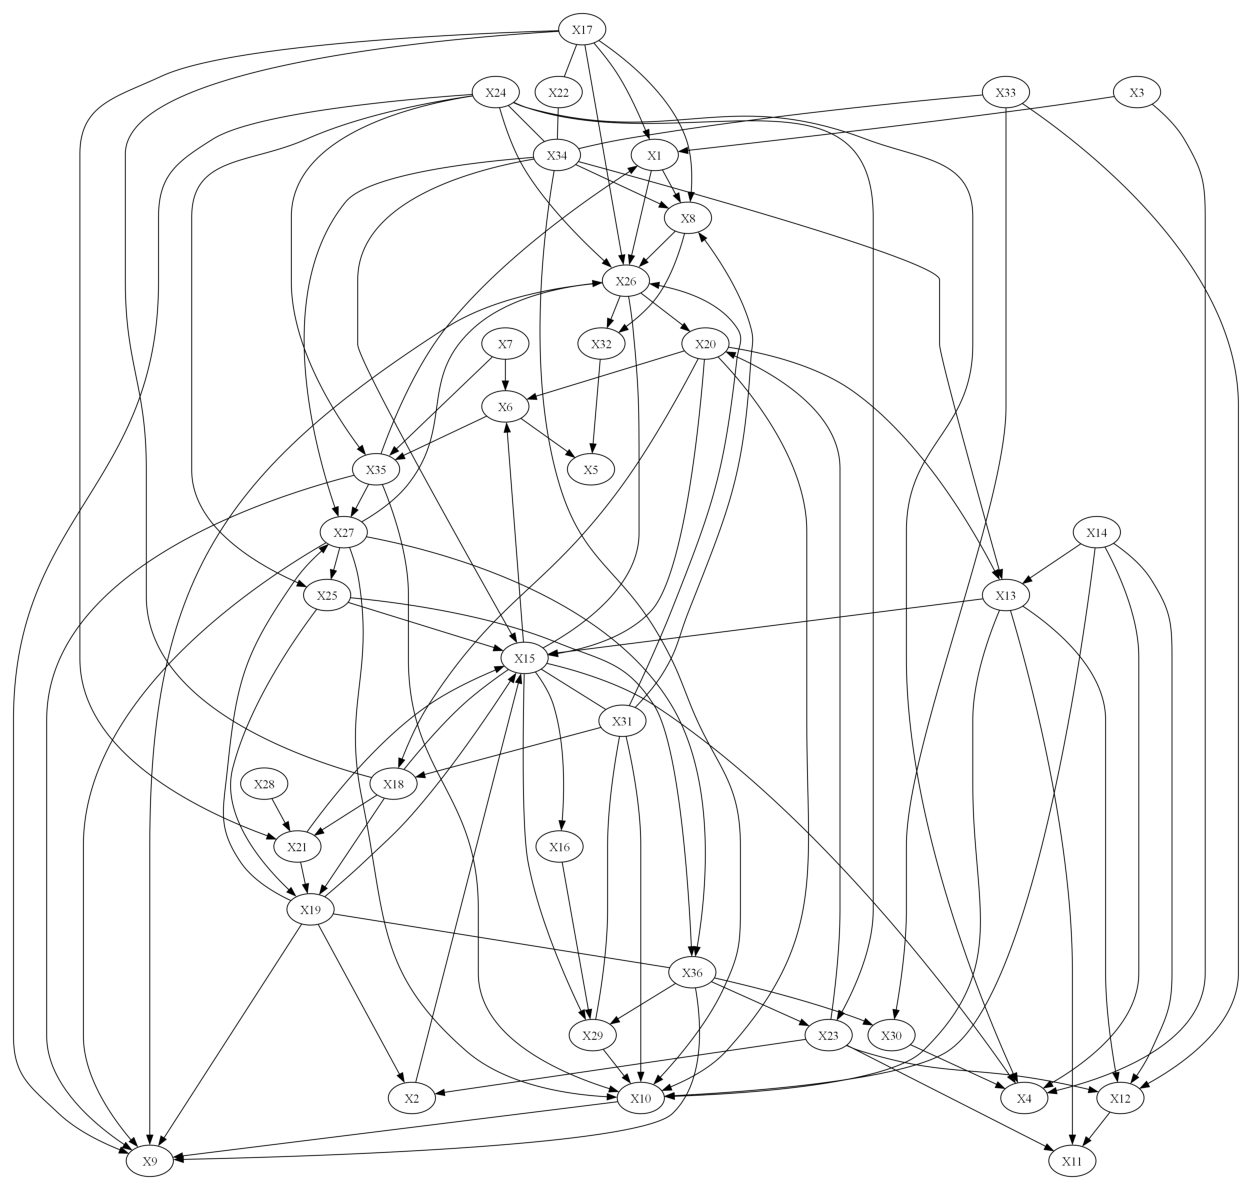

In [144]:
# visualization using pydot
cg.draw_pydot_graph()

pyd = GraphUtils.to_pydot(cg.G)
pyd.write_png('simple_test.png')

In [145]:
# Correlation analysis
corr_matrix = df.corr()['Risk_score'].sort_values(ascending=False)
print(corr_matrix)

Risk_score                        1.000000
Controversy_level                 0.607140
MSCI_ESG_index                    0.399728
Direct_carbon_emissions           0.255941
Environmental_scores              0.249957
Biodiversity                      0.224816
Disclosure_scores                 0.223603
CSR_board_size                    0.207576
GHG_sales                         0.199579
Climate_change_policy             0.192856
ESG_funds                         0.180290
CSR_commitee                      0.169345
Water_treatment                   0.162496
Indirect_carbon_emissions         0.161649
Total_carbon_emissions            0.154619
Energy_conservation               0.151372
Net_zero_targets                  0.150887
Waste_management                  0.141321
Govt_collaboration                0.117046
EPA_fines                         0.115974
Scope3_carbon_emissions           0.115470
Global_reporting_initiative       0.088152
Planning_zero_carbon              0.082374
SDG_targets

In [146]:
# sample causation model
X = df.drop('Risk_score', axis=1)
y = df['Risk_score']

model = LinearRegression()
# assuming Risk score is a linear combination of the other variables
model.fit(X, y)

X1 = X.copy()
X1['CSR_commitee'] = 1
X0 = X.copy()
X0['CSR_commitee'] = 0
effect = np.mean(model.predict(X1) - model.predict(X0))
print(effect)
# this score represents the effect of having a CSR committee on the risk score

-2.3441753434653663
